# 画像処理基礎

## 0. Python+OpenCVのプログラミング環境構築

In [2]:
import cv2

print("Python + OpenCV environment OK!")

Python + OpenCV environment OK!


## 1. Numpyを使った行列の四則演算

In [3]:
import numpy as np

A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

print(A+B) ## 和
print(A-B) ## 差
print(2*A) ## 積
print(A/2) ## 商
print(A@B) ## 行列積

[[ 6  8]
 [10 12]]
[[-4 -4]
 [-4 -4]]
[[2 4]
 [6 8]]
[[0.5 1. ]
 [1.5 2. ]]
[[19 22]
 [43 50]]


## 2. 画像の表示，縮小拡大，回転，二値化

### 2-1. 画像の表示

In [2]:
def read(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    return img

In [3]:
def display(img):
    plt.imshow(img)
    plt.show()

In [4]:
import cv2
import matplotlib.pyplot as plt

img = read("./LysGracieux_Arima.jpg")
display(img)

<Figure size 640x480 with 1 Axes>

## 2-2. 画像の縮小拡大

In [14]:
def scaling(img, rate):
    height = int(img.shape[0]*rate)
    width = int(img.shape[1]*rate)
    scaling_img = cv2.resize(img, (width, height))

    return scaling_img

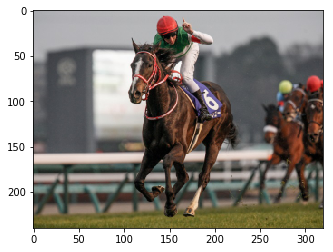

In [15]:
# reduction

scaling_img = scaling(img, rate=0.5)
display(scaling_img)

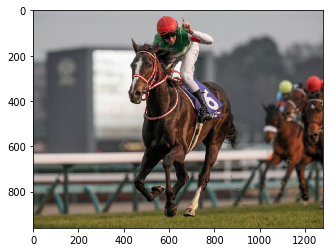

In [16]:
# expansion

scaling_img = scaling(img, rate=2)
display(scaling_img)

## 2-3. 画像の回転

In [8]:
def rotation(img, angle, scale=1):
    height = img.shape[0]
    width = img.shape[1]
    center = (int(width/2), int(height/2))
    trans = cv2.getRotationMatrix2D(center, angle , scale)
    rotation_img = cv2.warpAffine(img, trans, (width,height))

    return rotation_img

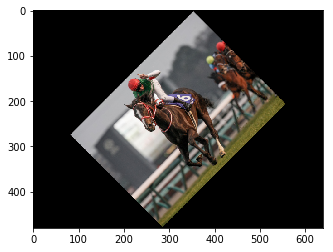

In [9]:
# 45 degree rotation

rotation_img = rotation(img, angle=45, scale=0.6)
display(rotation_img)

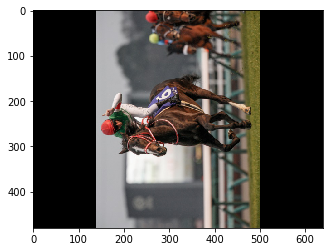

In [10]:
# 90 degree rotation

rotation_img = rotation(img, angle=90, scale=0.75)
display(rotation_img)

### 2-4. 画像の二値化

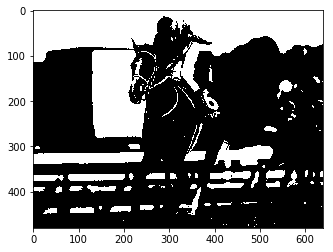

In [30]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
threshold, img_2 = cv2.threshold(img_gray, 0, 255, cv2.THRESH_OTSU)
plt.imshow(img_2)
plt.gray()
plt.show()

## 3. 差分画像の作成

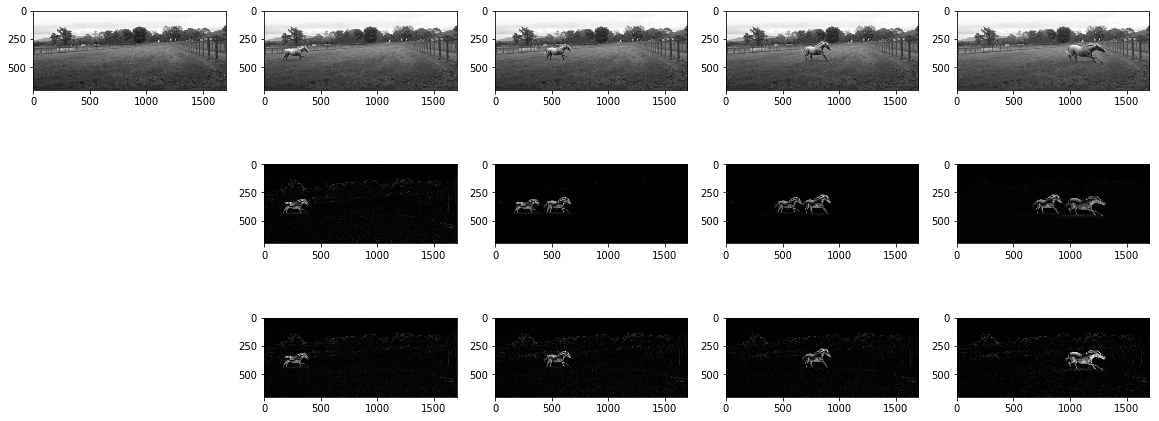

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20,8)) 

# read image
img_list = []
for i in range(5):
    img = cv2.imread("difference_img_data/"+str(i)+".png", 0).astype(int)
    img = img.astype(int)   # data type convert form unit8 to int
    img_list.append(img)
    plt.subplot(3, 5, i+1)
    plt.imshow(img)
    plt.gray()

# diff
diff_img_list = []
for i in range(4):   
    diff_img = np.abs(img_list[i+1]-img_list[i])
    diff_img_list.append(diff_img)
    plt.subplot(3, 5, i+7)
    plt.imshow(diff_img)
    plt.gray()

#diff
diffdiff_img = diff_img_list[0]
plt.subplot(3, 5, 12)
plt.imshow(diffdiff_img)
plt.gray()
for i in range(3):
    diffdiff_img = np.abs(diff_img_list[i+1]-diffdiff_img)
    plt.subplot(3, 5, i+13)
    plt.imshow(diffdiff_img)
    plt.gray()
    
plt.show()